<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [1]:
# type your code here
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [2]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_likes = pd.read_csv('Likes.csv')
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [4]:
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [5]:
df_likes.shape

(2104, 15)

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

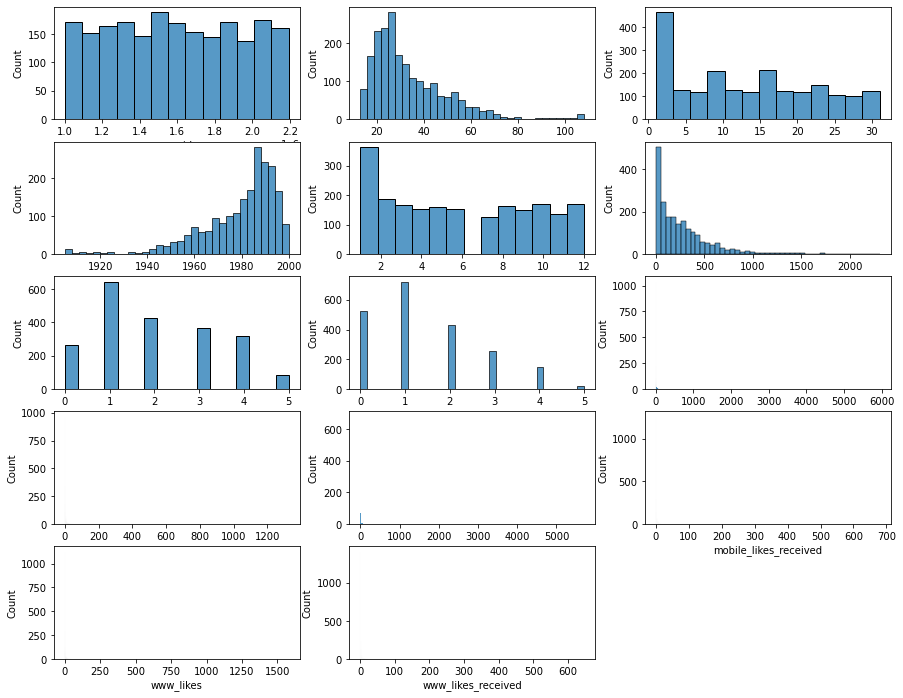

In [6]:
plt.figure(figsize=(15,12))
for a,b in enumerate(df_likes.select_dtypes(np.number).columns):
    plt.subplot(5,3,a+1)
    sns.histplot(df_likes[b])

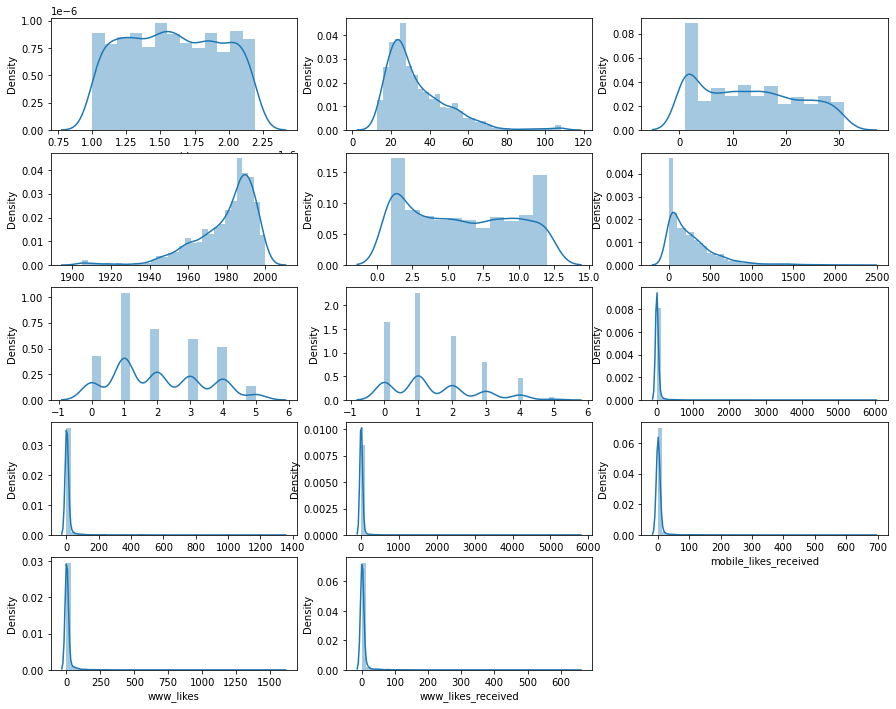

In [7]:
plt.figure(figsize=(15,12))
for a,b in enumerate(df_likes.select_dtypes(np.number).columns):
    plt.subplot(5,3,a+1)
    sns.distplot(df_likes[b])

In [8]:
df_likes = df_likes.drop('userid',axis=1)

In [9]:
df_likes = df_likes.drop(['dob_day','dob_year','dob_month'],axis=1)

In [10]:
df_likes['age'] = df_likes.age.astype('object')

In [11]:
df_likes.shape

(2104, 11)

In [12]:
df_likes.skew()

age                       1.628574
tenure                    2.083550
friend_count              0.339367
friendships_initiated     0.694958
likes                    24.959317
likes_received           18.418021
mobile_likes             28.564966
mobile_likes_received    18.566706
www_likes                16.941493
www_likes_received       17.059494
dtype: float64

In [13]:
df_likes.describe(include='all')

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2104.0,2102,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
unique,83.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,25.0,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,139.0,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,274.701046,2.039924,1.453422,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,NaN,NaN,297.508563,1.397070,1.242272,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,54.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,191.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,387.000000,3.000000,2.000000,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000


In [14]:
df_likes[['likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received','tenure']] = np.sqrt(df_likes[['likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received','tenure']])

In [15]:
df_likes['likes'] = np.sqrt(df_likes['likes'])

In [16]:
df_likes.skew()

age                      1.628574
tenure                   0.576790
friend_count             0.339367
friendships_initiated    0.694958
likes                    6.316372
likes_received           4.926598
mobile_likes             7.844530
mobile_likes_received    5.333964
www_likes                4.541539
www_likes_received       4.762303
dtype: float64

<AxesSubplot:>

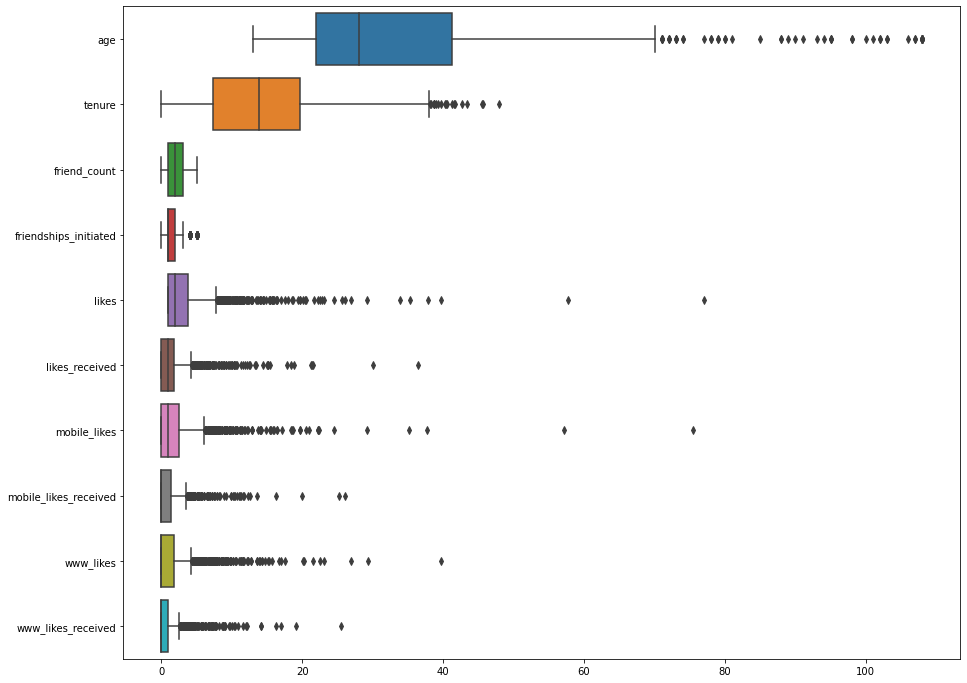

In [17]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_likes,orient='h')

In [18]:
q1 = df_likes.quantile(0.25)
q3 = df_likes.quantile(0.75)
iqr = q3 - q1
df_likes =  df_likes[~((df_likes < q1- (1.5*iqr)) | (df_likes > q3 + (1.5*iqr))).any(axis=1)]

<AxesSubplot:>

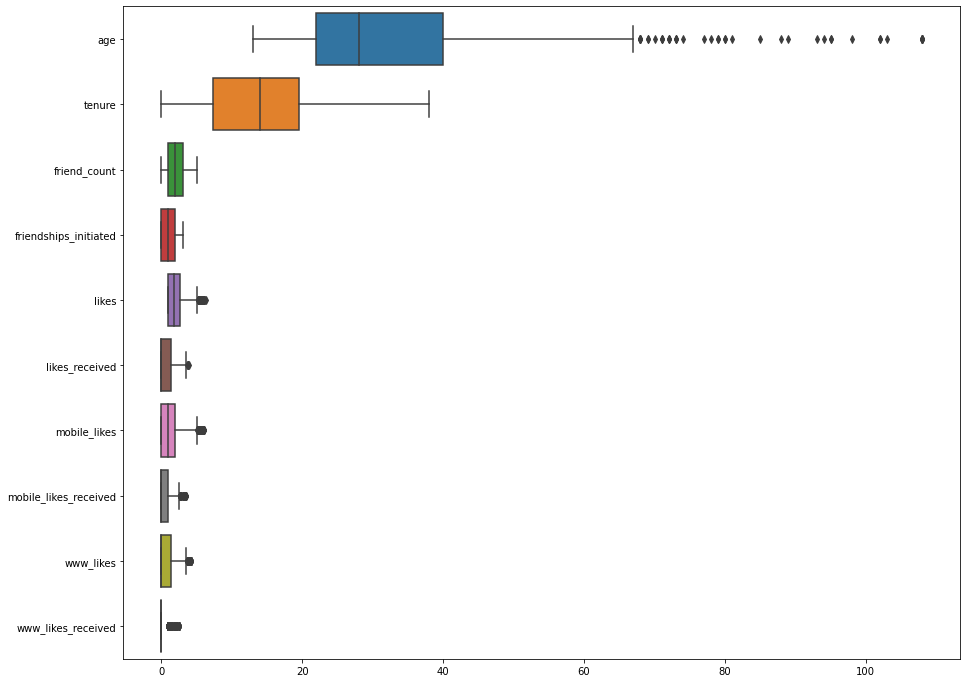

In [19]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_likes,orient='h')

In [20]:
df_likes.skew()

age                      1.615656
tenure                   0.377685
friend_count             0.414317
friendships_initiated    0.364259
likes                    1.371158
likes_received           1.003931
mobile_likes             1.156413
mobile_likes_received    1.468838
www_likes                1.389436
www_likes_received       1.743624
dtype: float64

In [21]:
df_likes = df_likes.dropna(subset=['gender'])

In [22]:
df_likes.shape

(1539, 11)

## Inference:

Step 1 : The plots have been plotted using subplots and understood how the data is skewed. <br>
Step 2 : The Data is skewed , after then the neccessary transformation was done to reduce the skewness. <br>
Step 3 : The Outluers are present in the data and they are removed.

<AxesSubplot:>

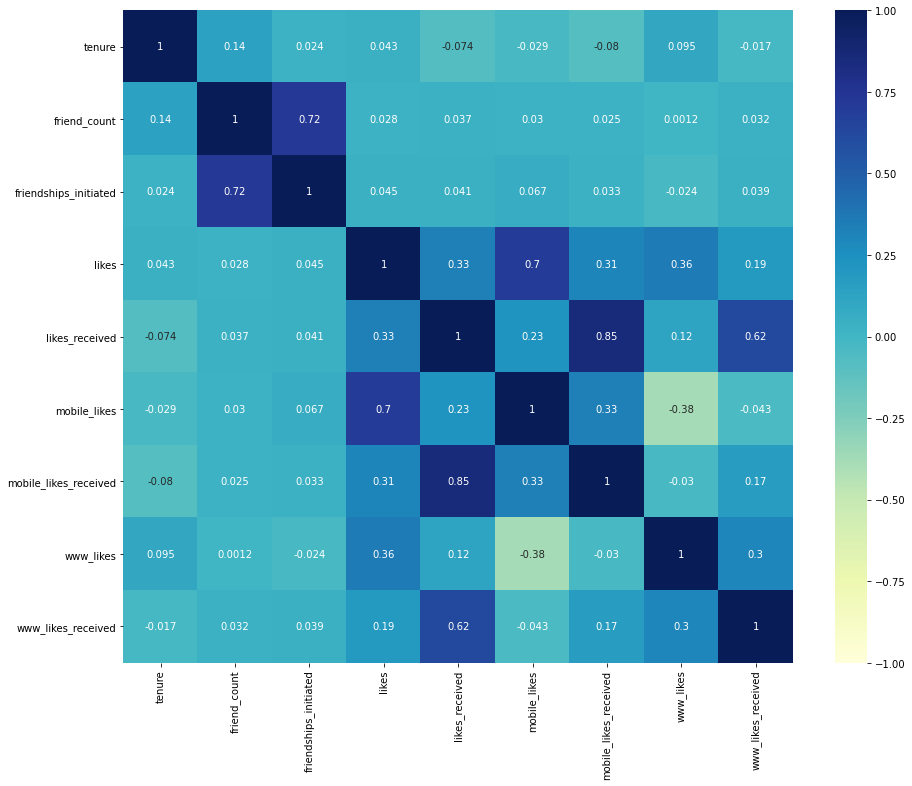

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df_likes.corr(),annot=True,cmap='YlGnBu',vmax=1.0,vmin=-1.0)

## Inference:

Step1 : The independent variable which have positive correlation with dependent variable is "mobile_likes","www_likes","likes_received" <br>
    The independent variable which have slight negative correlation with dependent variable is "tenure" <br>
Step2 : There is strong positive correlation between likes_received and mobile_likes_received <br>
    There is negative correlation between www_likes and mobile_likes

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [24]:
df_indep = df_likes.drop('likes',axis=1)
df_dep = df_likes['likes']

In [25]:
le = LabelEncoder()
df_likes['age' ] = le.fit_transform(df_likes[['age']])

In [26]:
df_likes['gender_male'] = pd.get_dummies(df_likes['gender'],drop_first=True)

In [27]:
df_likes.drop('gender',axis=1,inplace=True)

In [28]:
df_num = df_likes.select_dtypes(np.number).columns
df_likes[df_num] = df_likes.select_dtypes(np.number).apply(lambda x: (x-x.mean())/x.std())

In [29]:
X = df_likes.drop('likes',axis=1)
X = sm.add_constant(X)
y = df_likes['likes']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 11)
(462, 11)
(1077,)
(462,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [31]:
MLR_full_model = sm.OLS(y_train,X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:14:57   Log-Likelihood:                 47.790
No. Observations:                1077   AIC:                            -73.58
Df Residuals:                    1066   BIC:                            -18.78
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [32]:
# R_squared
MLR_full_model.rsquared

0.9435682125610815

In [33]:
# RMSE on both test and train dataset

y_train_pred = MLR_full_model.predict(X_train)

mse = mean_squared_error(y_train,y_train_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of train dataset',rmse)

y_test_pred = MLR_full_model.predict(X_test)

mse = mean_squared_error(y_test,y_test_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of test dataset',rmse)

Root Mean squared error of train dataset 0.23146841595796674
Root Mean squared error of test dataset 0.2354130679726276


In [34]:
# As the rmse value of test dataset is same when compared with train dataset. The model is robust.

In [35]:
linreg = LinearRegression()
linrfe = RFE(estimator=linreg,n_features_to_select=5)
rfe_model = linrfe.fit(X_train,y_train)
a = pd.Series(rfe_model.ranking_,name='rank')
b = pd.Series(df_likes.columns.values,name='name')
feat = pd.concat([a,b],axis=1)
sig_var = feat[feat['rank']==1]['name'].values
sig_var

array(['tenure', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes'], dtype=object)

In [36]:
X = X[sig_var]
X = sm.add_constant(X)
y = df_likes['likes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 6)
(462, 6)
(1077,)
(462,)


In [37]:
MLR_rfe_model = sm.OLS(y_train,X_train).fit()
print(MLR_rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3570.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:16:10   Log-Likelihood:                 46.161
No. Observations:                1077   AIC:                            -80.32
Df Residuals:                    1071   BIC:                            -50.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [38]:
# R_squared rfe
MLR_rfe_model.rsquared

0.9433972853894055

In [61]:
# RMSE on both test and train dataset

y_train_pred = MLR_rfe_model.predict(X_train)

mse = mean_squared_error(y_train,y_train_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of train dataset',rmse)

y_test_pred = MLR_rfe_model.predict(X_test)

mse = mean_squared_error(y_test,y_test_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of test dataset',rmse)

Root Mean squared error of train dataset 0.2318187001644083
Root Mean squared error of test dataset 0.23531461659652395


In [62]:
MLR_rfe_model.rsquared

0.9433972853894055

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [63]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_rfe_model.resid, MLR_rfe_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 415.29316840439617), ('p-value', 9.881570162068467e-248)]

In [64]:
p = 2.825071501895677e-85
if p <0.05:
    print('ha is selected')
else:
    print('h0 is selected')

ha is selected


In [65]:
# There is a heteroscedasticity present in the data

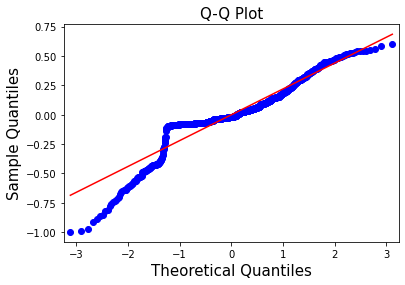

In [66]:
# plot the Q-Q plot
# 'r' represents the regression line
sm.qqplot(MLR_rfe_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [67]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use log transformation of y_train 
MLR_model_after_transform = sm.OLS(np.exp(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     405.2
Date:                Tue, 01 Feb 2022   Prob (F-statistic):          5.63e-244
Time:                        01:29:37   Log-Likelihood:                -2409.7
No. Observations:                1077   AIC:                             4831.
Df Residuals:                    1071   BIC:                             4861.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.99

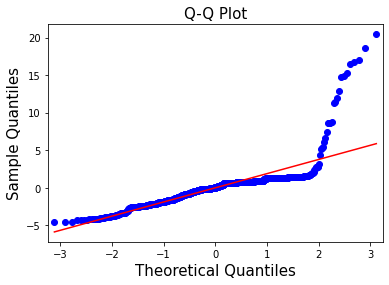

In [68]:
# plot the Q-Q plot
# 'r' represents the regression line
sm.qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [72]:
print('The mean of the residuals is',round((np.sum(MLR_model_after_transform.resid)/len(MLR_model_after_transform.resid)),4))

The mean of the residuals is 0.0


<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [74]:
scores = cross_val_score(estimator=linreg,X=X_train,y=y_train,cv=5,scoring='r2')
scores

array([0.92944137, 0.94919819, 0.9422407 , 0.93992939, 0.94622738])

In [75]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.92944137 0.94919819 0.9422407  0.93992939 0.94622738]

Minimum score obtained:  0.9294
Maximum score obtained:  0.9492
Average score obtained:  0.9414
